#**Phase 2**

**Submitted to:**
Sir Mr. Muhammad Bilal

**Course:** Data Analysis and Visualization


**Group Member 1:**

Name: Ayesha Tahir         
Roll# NUM-BSCS-2022-17

**Group Member 2:**

Name: Shazia Nazeer  
Roll# NUM-BSCS-2022-09

**Task 1: Exploratory Data Analysis (EDA)**

Dataset Preview:
                                            sentence     source     target  \
0               a group of soldiers provide security      group   security   
1  this beautiful waves ring is crafted in platin...  beautiful      waves   
2  A plate of salad that includes strawberries on...       that       side   
3  map from which users can select the district i...       they  hospitals   
4      coach is given a guard of honour from players      coach    players   

            relation                                             tokens  \
0        ['provide']  ['a', 'group', 'of', 'soldiers', 'provide', 's...   
1  ['crafted', 'in']  ['this', 'beautiful', 'waves', 'ring', 'is', '...   
2    ['plate', 'of']  ['A', 'plate', 'of', 'salad', 'that', 'include...   
3    ['map', 'from']  ['map', 'from', 'which', 'users', 'can', 'sele...   
4          ['given']  ['coach', 'is', 'given', 'a', 'guard', 'of', '...   

                                                tags  
0       

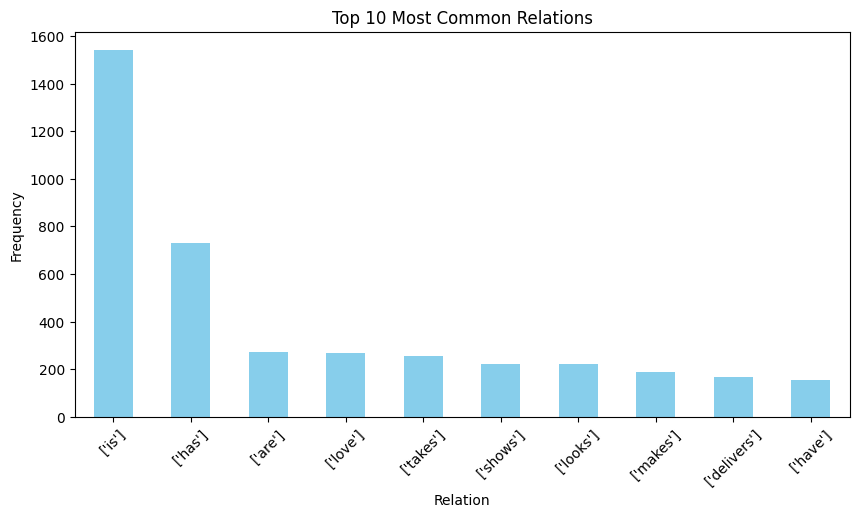

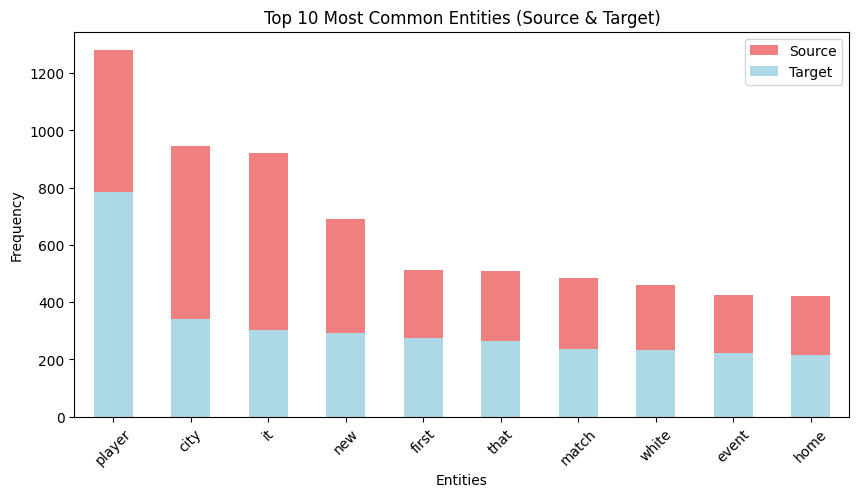

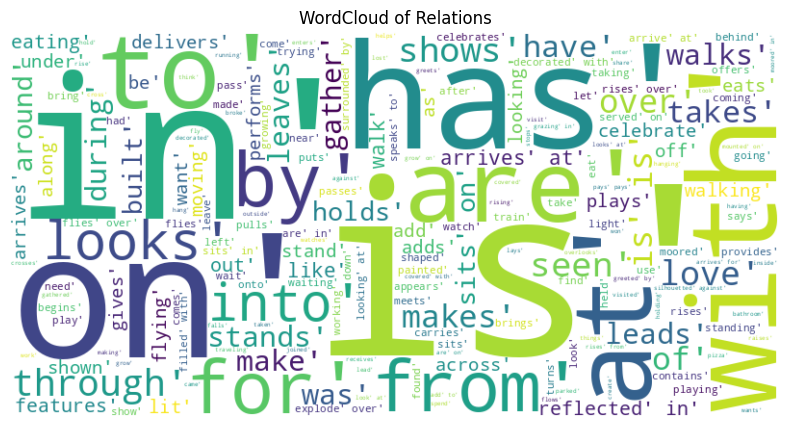

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import spacy
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("/content/kG nlp.csv")

# Display basic information
print("Dataset Preview:")
print(df.head())

# -------- 1. Exploratory Data Analysis (EDA) -------- #
# Most common relations
relation_counts = df['relation'].explode().value_counts()
print("\nMost Common Relations:\n", relation_counts.head(10))

# Most common entities
source_counts = df['source'].value_counts()
target_counts = df['target'].value_counts()

# Plot relation frequencies
plt.figure(figsize=(10, 5))
relation_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Relations")
plt.xlabel("Relation")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Plot entity frequencies
plt.figure(figsize=(10, 5))
source_counts.head(10).plot(kind='bar', color='lightcoral', label='Source')
target_counts.head(10).plot(kind='bar', color='lightblue', label='Target')
plt.title("Top 10 Most Common Entities (Source & Target)")
plt.xlabel("Entities")
plt.ylabel("Frequency")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# WordCloud for Relations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['relation'].explode()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Relations")
plt.show()


**Task 2: Entity Relation Graph**

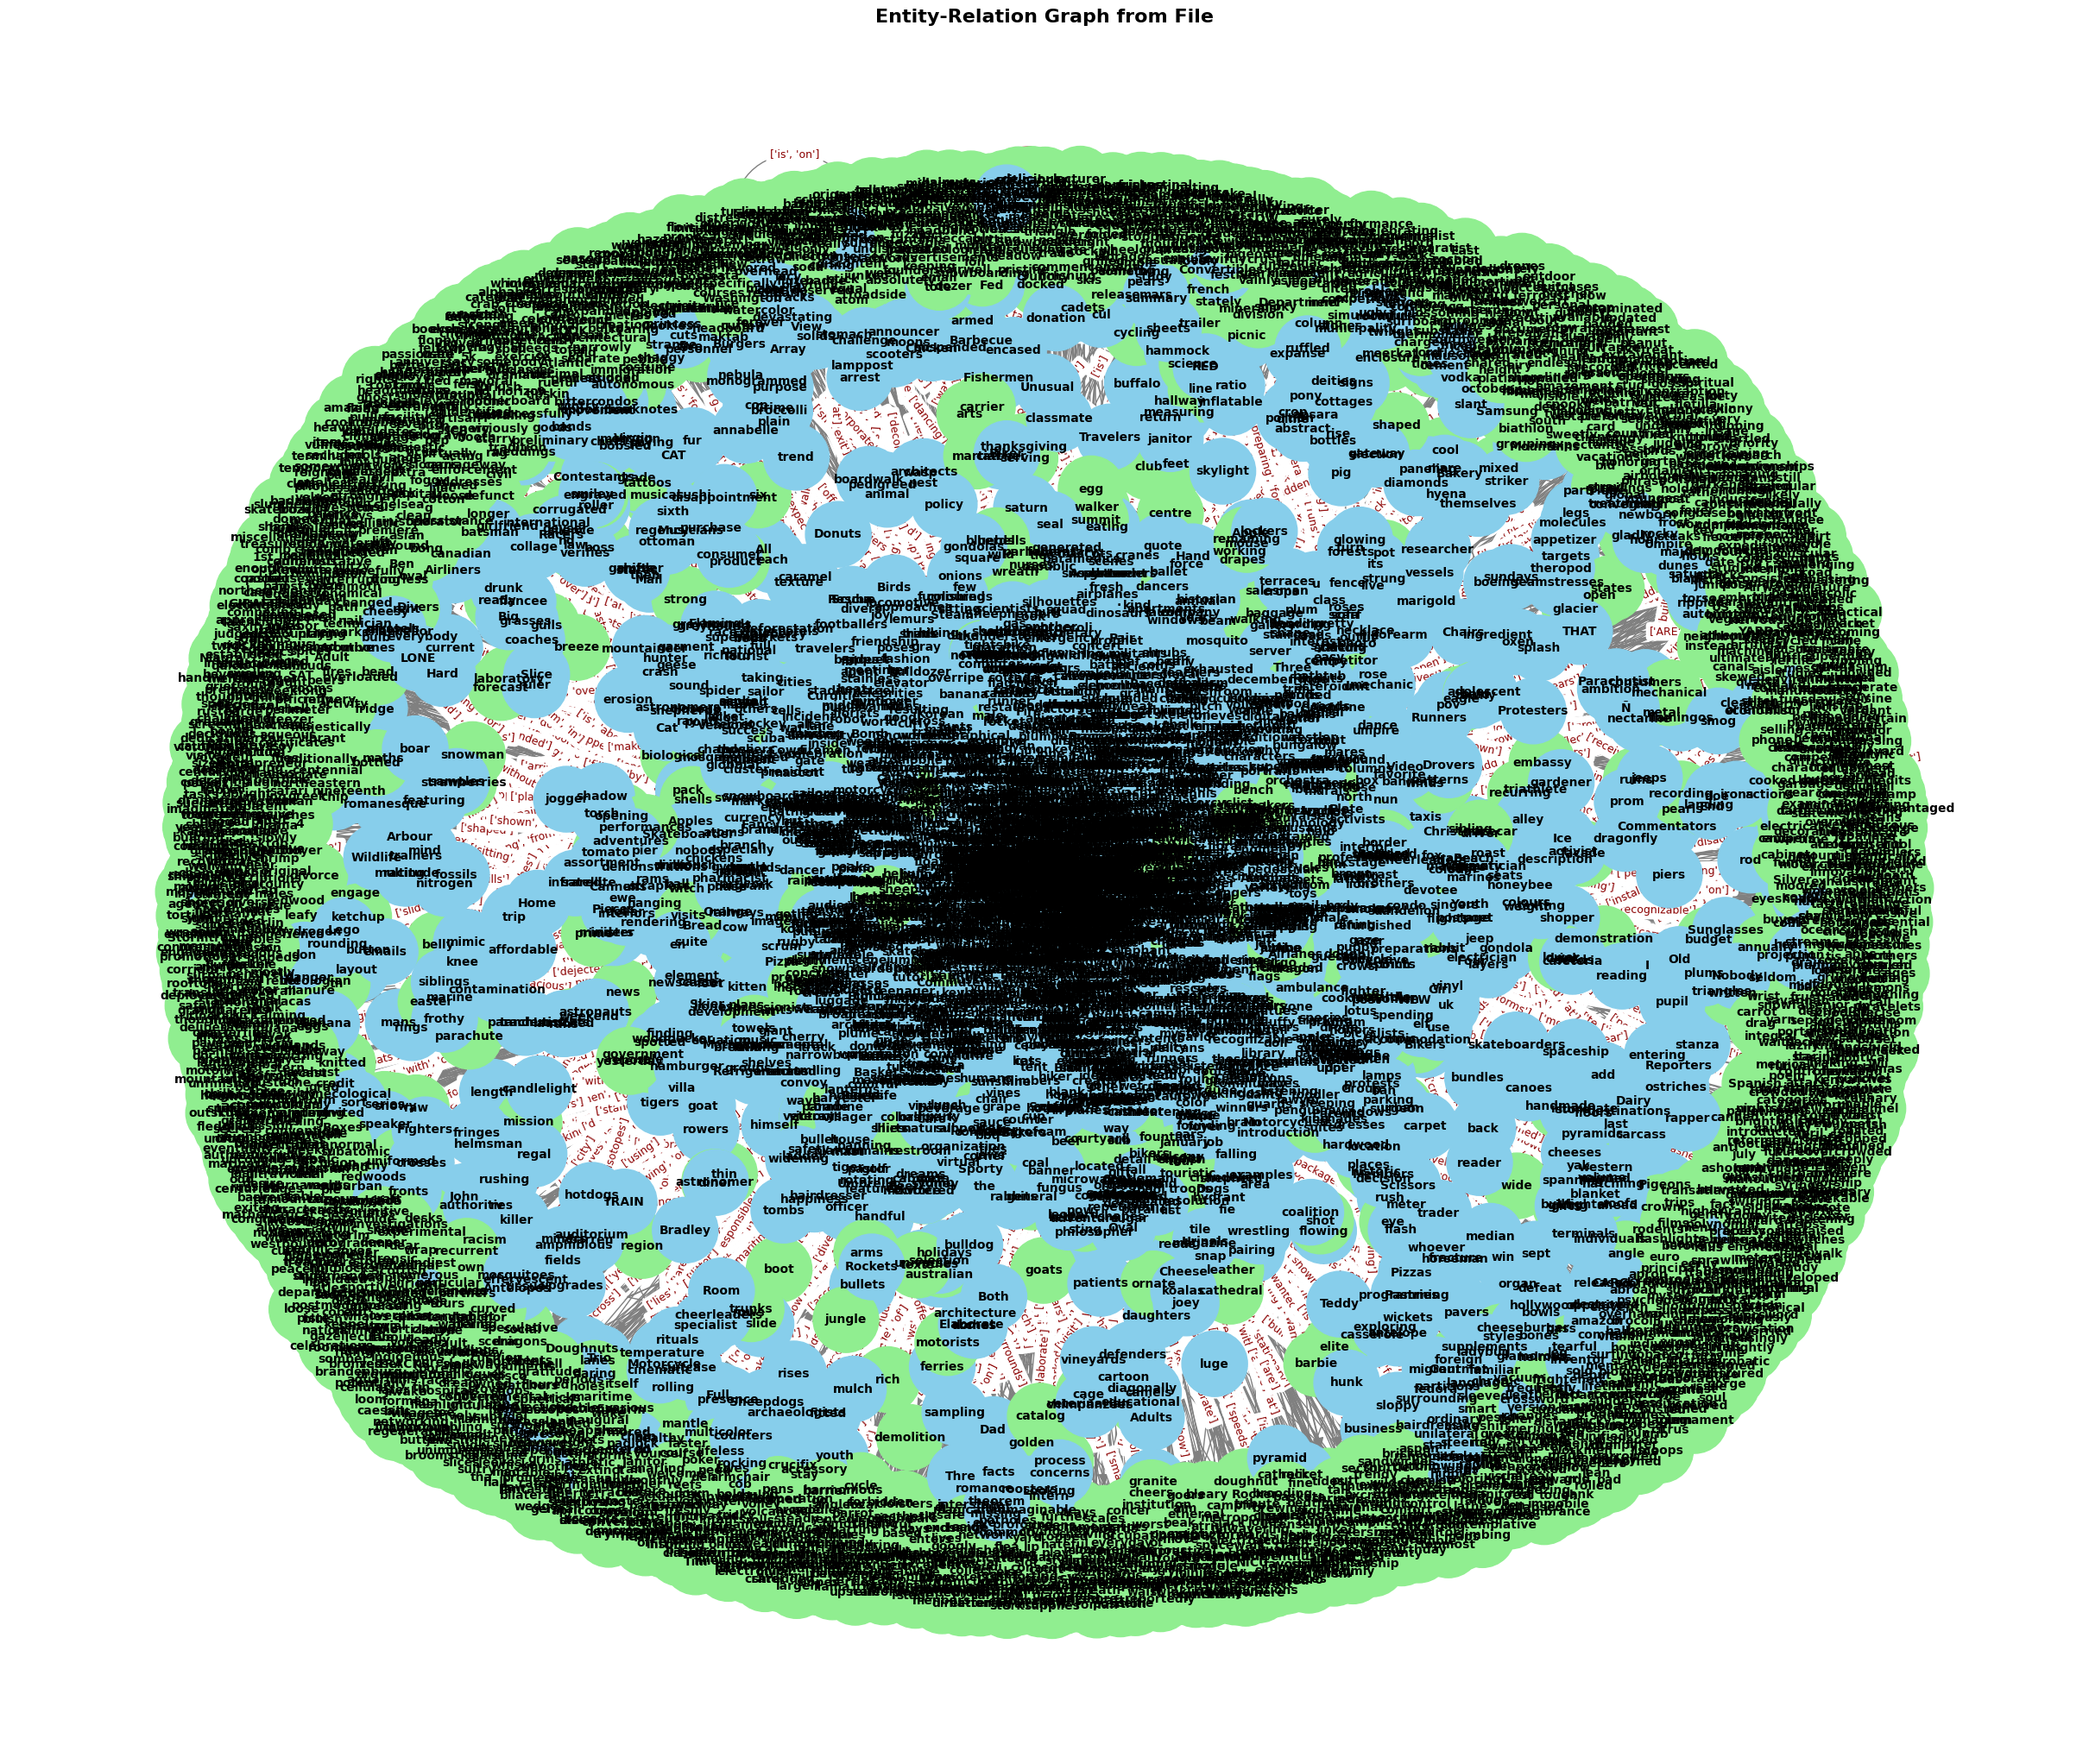

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = "/content/kG nlp.csv"
data = pd.read_csv(file_path)  # Load CSV into a DataFrame

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in data.iterrows():
    source = row["source"]
    target = row["target"]
    relation = row["relation"]
    graph.add_node(source, color='skyblue')  # Source node
    graph.add_node(target, color='lightgreen')  # Target node
    graph.add_edge(source, target, label=relation)  # Edge with relation as label

# Extract node colors for visualization
node_colors = [graph.nodes[node].get('color', 'skyblue') for node in graph.nodes]

# Draw the graph
plt.figure(figsize=(24, 20))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=3000,
        font_size=10, font_weight="bold", edge_color="gray", arrowsize=20)
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9,
                             font_color="darkred", label_pos=0.5)

# Add title and display the graph
plt.title("Entity-Relation Graph from File", fontsize=16, fontweight='bold')
plt.show()


**Task 3: Enhanced Entity Relation Graph**

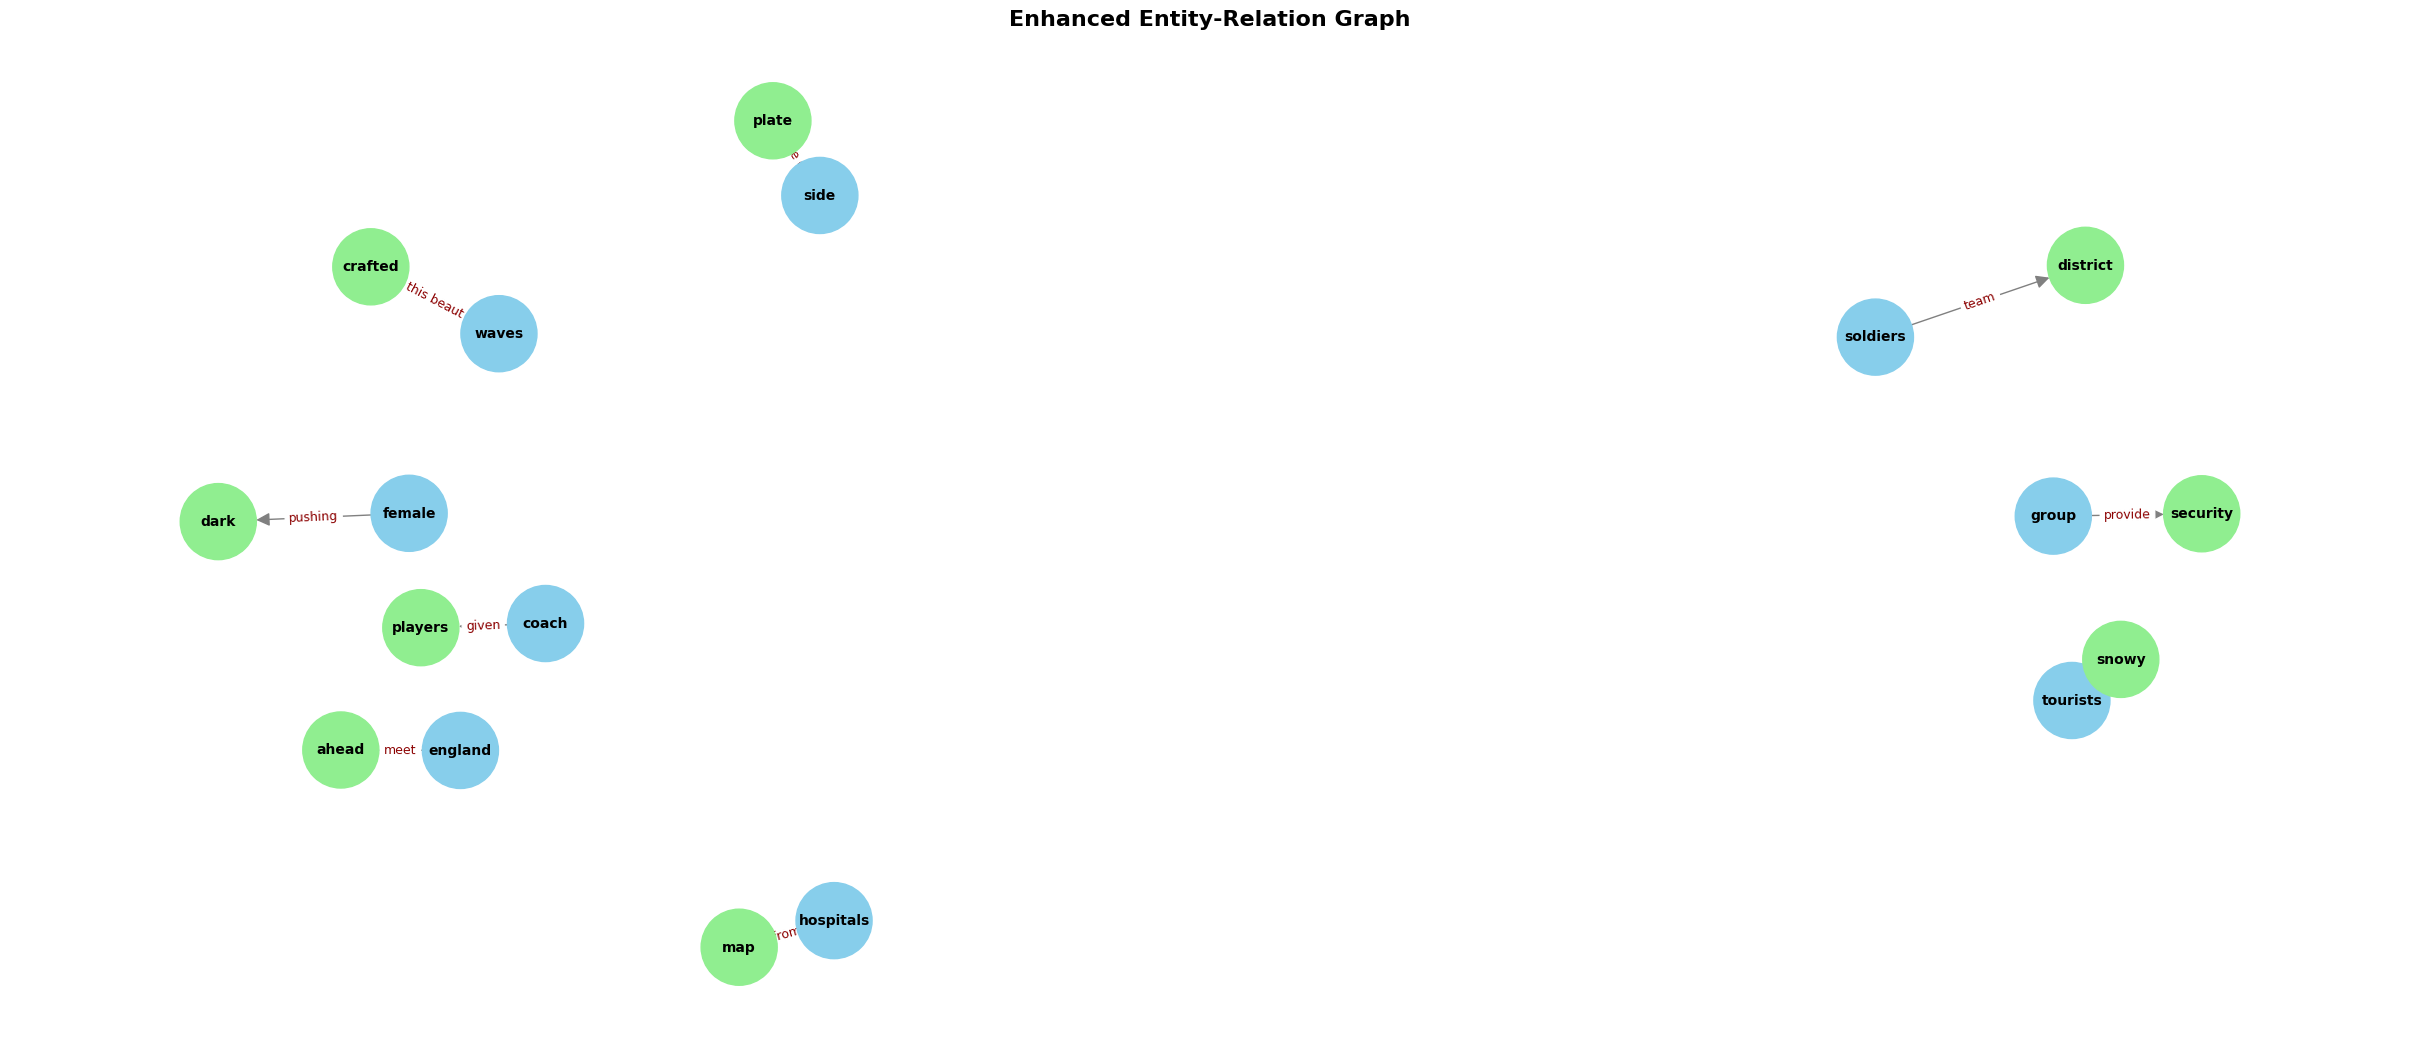

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example dataset
data = [
    {"source": "group", "target": "security", "relation": "provide"},
    {"source": "waves", "target": "crafted", "relation": "this beaut"},
    {"source": "side", "target": "plate", "relation": "A plate of that"},
    {"source": "hospitals", "target": "map", "relation": "map from they"},
    {"source": "coach", "target": "players", "relation": "given"},
    {"source": "england", "target": "ahead", "relation": "meet"},
    {"source": "female", "target": "dark", "relation": "pushing"},
    {"source": "tourists", "target": "snowy", "relation": "descend"},
    {"source": "soldiers", "target": "district", "relation": "team"}
]

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges
for row in data:
    graph.add_node(row["source"], color='skyblue')  # Source node with color
    graph.add_node(row["target"], color='lightgreen')  # Target node with different color
    graph.add_edge(row["source"], row["target"], label=row["relation"])  # Add edge with relation label

# Extract node colors for visualization
node_colors = [graph.nodes[node].get('color', 'skyblue') for node in graph.nodes]

# Draw the graph with enhancements
plt.figure(figsize=(24, 10))  # Increased size for clarity
pos = nx.spring_layout(graph, seed=42)  # Position nodes dynamically

# Draw nodes and edges with specific styles
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=3000,
        font_size=10, font_weight="bold", edge_color="gray", arrowsize=20)
edge_labels = nx.get_edge_attributes(graph, "label")

# Draw edge labels with better positioning
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9,
                             font_color="darkred", label_pos=0.5)

# Add a title and improve readability
plt.title("Enhanced Entity-Relation Graph", fontsize=16, fontweight='bold')
plt.show()


**Task 4: Text Extraction**

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("kG nlp.csv")

# Extract (Source, Relation, Target) triplets
triplets = []

for _, row in df.iterrows():
    source = row['source']
    target = row['target']

    # Convert the string representation of the list to an actual list
    relations = eval(row['relation'])

    # Join multiple relations (if any) into a single string
    relation = ' '.join(relations).strip()

    triplets.append((source, relation, target))

# Convert the list of triplets to a DataFrame
triplet_df = pd.DataFrame(triplets, columns=['Source', 'Relation', 'Target'])

# Save the extracted triplets to a new CSV file
triplet_df.to_csv("extracted_triplets.csv", index=False)

# Optional: Display the first few triplets
print(triplet_df.head())


      Source    Relation     Target
0      group     provide   security
1  beautiful  crafted in      waves
2       that    plate of       side
3       they    map from  hospitals
4      coach       given    players


**Task 5: Predict Most Relevant Relation**

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Load the extracted triplets
df = pd.read_csv("extracted_triplets.csv")

# Function to predict relation for new (source, target) input
def predict_relation(input_source, input_target):
    max_score = 0
    best_match = None

    for _, row in df.iterrows():
        source_score = fuzz.partial_ratio(input_source.lower(), row['Source'].lower())
        target_score = fuzz.partial_ratio(input_target.lower(), row['Target'].lower())
        avg_score = (source_score + target_score) / 2

        if avg_score > max_score:
            max_score = avg_score
            best_match = row

    if best_match is not None:
        return f"Predicted Relation: {best_match['Relation']} (Similarity: {max_score}%)"
    else:
        return "No suitable relation found."

# Example usage
source_input = input("Enter source entity: ")
target_input = input("Enter target entity: ")

print(predict_relation(source_input, target_input))

Enter source entity: Apples
Enter target entity: Tree
Predicted Relation: are green (Similarity: 90.0%)
